#📌 Extracción

In [251]:
!pip install -U kaleido

In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import kaleido

from plotly.subplots import make_subplots


# Cargar archivo JSON
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Telecom_X/TelecomX_Data.json")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [254]:
data.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [255]:
data.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [256]:
# Columnas con diccionarios
columnas_dict = ['customer', 'phone', 'internet', 'account']

In [257]:
# Transformar columnas con diccionarios a columnas simples
for col in columnas_dict:
    data_temp = pd.json_normalize(data[col])
    data = pd.concat([data, data_temp], axis=1)
    data.drop(columns=[col], inplace=True)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [259]:
data.reset_index(drop=True, inplace=True)
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [260]:
data.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


#🔧 Transformación

Verificar si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas

In [261]:
# Crear la columna cuentas diarias dividiendo 'ChargesMonthly' por 30
# y que el resultado muestre solo 2 decimales
data["Cuentas_Diarias"] = data["Charges.Monthly"] / 30
data["Cuentas_Diarias"] = data["Cuentas_Diarias"].round(2)

data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [262]:
# Columnas a realizar cambio  "Yes"/"No"
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Verificar los cambios aplicados
data[bin_cols].head()


,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [263]:
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [264]:

# Reemplazar "No phone service" por "No" en la columna MultipleLines
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

# Verificar los valores únicos después del reemplazo
data['MultipleLines'].value_counts()


,count
MultipleLines,
No,4202
Yes,3065


In [265]:
# Transformar "Yes"/"No" a 1/0 en MultipleLines
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0})

# Verificar el resultado
data[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [266]:
# Reemplazar valores en la columna 'Contract'
data['Contract'] = data['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'
})

data['Contract'] = data['Contract'].astype('int64')

# Verificar que los cambios se hayan aplicado correctamente
data['Contract'].value_counts()

,count
Contract,
1,4005
3,1743
2,1519


In [267]:
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,No,Yes,Yes,No,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,No,No,No,Yes,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,Yes,No,No,No,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,Yes,No,Yes,Yes,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,No,Yes,Yes,No,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,No,Yes,No,No,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,No,No,No,Yes,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,No,No,No,No,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,Yes,Yes,No,Yes,3,0,Mailed check,67.85,4627.65,2.26


In [268]:
# Columnas que se transformarán: "Sí" = 1, todo lo demás = 0
cols_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Aplicar transformación utilizamos lambda
for col in cols_to_binary:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)


In [269]:
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [270]:
# Valores repetidos en la columna 'customerID'
data['customerID'].duplicated().sum()
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [271]:
# Diccionario para formas de pago
payment_map = {
    'Electronic check': '1',
    'Mailed check': '2',
    'Bank transfer (automatic)': '3',
    'Credit card (automatic)': '4'
}

# Aplicar a la columna MetodoPago
data['PaymentMethod'] = data['PaymentMethod'].replace(payment_map)



In [272]:
# Verificar los cambios
data['PaymentMethod'].value_counts()

,count
PaymentMethod,
1,2445
2,1665
3,1589
4,1568


In [273]:
# Diccionario con los nuevos nombres de las columnas
column_rename_map = {
    'customerID': 'id_cliente',
    'Churn': 'evasion',
    'gender': 'genero',
    'SeniorCitizen': 'senior',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad',
    'PhoneService': 's_telefono',
    'MultipleLines': 'multipleslineas',
    'InternetService': 's_internet',
    'OnlineSecurity': 'seguridad_ol',
    'OnlineBackup': 'respaldo_ol',
    'DeviceProtection': 'proteccion_d',
    'TechSupport': 'serv_tec',
    'StreamingTV': 'tv_str',
    'StreamingMovies': 'pel_str',
    'Contract': 'contrato',
    'PaperlessBilling': 'boleta_elec',
    'PaymentMethod': 'met_pago',
    'Charges.Monthly': 'pago_mensual',
    'Charges.Total': 'pago_total',
    'Cuentas_Diarias': 'cuentas_diarias'
}

# Renombrar columnas en df
data.rename(columns=column_rename_map, inplace=True)

In [274]:
data.columns

Index(['id_cliente', 'evasion', 'genero', 'senior', 'pareja', 'dependientes',
       'antiguedad', 's_telefono', 'multipleslineas', 's_internet',
       'seguridad_ol', 'respaldo_ol', 'proteccion_d', 'serv_tec', 'tv_str',
       'pel_str', 'contrato', 'boleta_elec', 'met_pago', 'pago_mensual',
       'pago_total', 'cuentas_diarias'],
      dtype='object')

In [275]:
# 'Yes' por 'Sí' en la columna 'evasion'
data['evasion'] = data['evasion'].replace({'Yes': '1'}).replace({'':'0'}).replace({'No': '0'}).replace({'Si': '1'})
data['evasion'] = data['evasion'].astype('int64')

# Verificar cambios
data['evasion'].value_counts()


,count
evasion,
0,5398
1,1869


In [276]:
# Reemplazar en la coluna genero female y male
data['genero'] = data['genero'].replace({'Female': '1'}).replace({'Male':'0'})
data['genero'] = data['genero'].astype('int64')

# Verificar cambios
data['genero'].value_counts()

,count
genero,
0,3675
1,3592


In [277]:
# Reemplazar en la columna s_internet por servicios de internet
data['s_internet'] = data['s_internet'].replace({'Fiber optic': '1'}).replace({'DSL':'2'}).replace({'No':'0'})
data['s_internet'] = data['s_internet'].astype('int64')

# Verificar cambios
data['s_internet'].value_counts()

,count
s_internet,
1,3198
2,2488
0,1581


In [278]:
data

,id_cliente,evasion,genero,senior,pareja,dependientes,antiguedad,s_telefono,multipleslineas,s_internet,...,proteccion_d,serv_tec,tv_str,pel_str,contrato,boleta_elec,met_pago,pago_mensual,pago_total,cuentas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,2,...,0,1,1,0,2,1,2,65.60,593.3,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,2,...,0,0,0,1,1,0,2,59.90,542.4,2.00
2,0004-TLHLJ,1,0,0,0,0,4,1,0,1,...,1,0,0,0,1,1,1,73.90,280.85,2.46
3,0011-IGKFF,1,0,1,1,0,13,1,0,1,...,1,0,1,1,1,1,1,98.00,1237.85,3.27
4,0013-EXCHZ,1,1,1,1,0,3,1,0,1,...,0,1,1,0,1,1,2,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,2,...,0,1,0,0,2,0,2,55.15,742.9,1.84
7263,9992-RRAMN,1,0,0,1,0,22,1,1,1,...,0,0,0,1,1,1,1,85.10,1873.7,2.84
7264,9992-UJOEL,0,0,0,0,0,2,1,0,2,...,0,0,0,0,1,1,2,50.30,92.75,1.68
7265,9993-LHIEB,0,0,0,1,1,67,1,0,2,...,1,1,0,1,3,0,2,67.85,4627.65,2.26


In [279]:
# pago_total convertir a numérico
data['pago_total'] = pd.to_numeric(data['pago_total'], errors='coerce')

# Reemplazar valores faltantes usando antigüedad * pago_mensual
mask = data['pago_total'].isna()
data.loc[mask, 'pago_total'] = (
    data.loc[mask, 'antiguedad'] * data.loc[mask, 'pago_mensual']
)

In [280]:
# Columna contrato a int64
data['contrato'] = data['contrato'].astype('int64')

# Verificar cambios
data['contrato'].value_counts()

,count
contrato,
1,4005
3,1743
2,1519


In [281]:
# Columna met_pago a int64
data['met_pago'] = data['met_pago'].astype('int64')

# Verificar los cambios
data['met_pago'].value_counts()

,count
met_pago,
1,2445
2,1665
3,1589
4,1568


In [282]:
# Verificar si hay valores NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       7267 non-null   object 
 1   evasion          7267 non-null   int64  
 2   genero           7267 non-null   int64  
 3   senior           7267 non-null   int64  
 4   pareja           7267 non-null   int64  
 5   dependientes     7267 non-null   int64  
 6   antiguedad       7267 non-null   int64  
 7   s_telefono       7267 non-null   int64  
 8   multipleslineas  7267 non-null   int64  
 9   s_internet       7267 non-null   int64  
 10  seguridad_ol     7267 non-null   int64  
 11  respaldo_ol      7267 non-null   int64  
 12  proteccion_d     7267 non-null   int64  
 13  serv_tec         7267 non-null   int64  
 14  tv_str           7267 non-null   int64  
 15  pel_str          7267 non-null   int64  
 16  contrato         7267 non-null   int64  
 17  boleta_elec   

In [283]:
# guardar archivo
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Telecom_X/data_csv.csv', index=False)

#📊 Carga y análisis

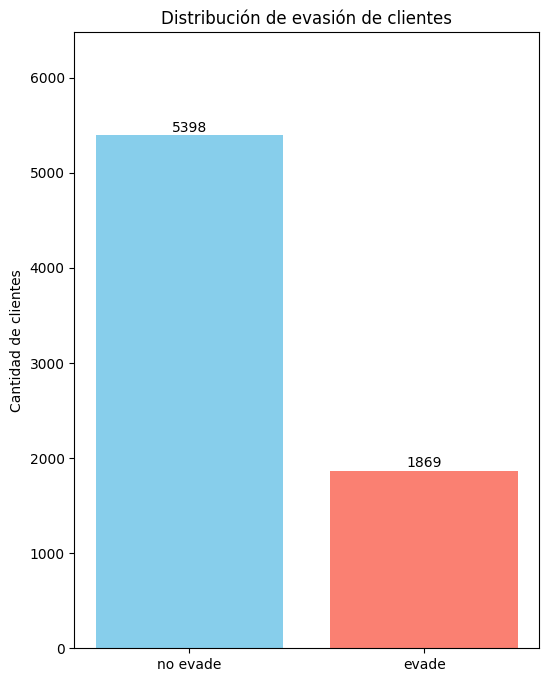

In [284]:

# Calcular frecuencia de evasores y no evasores
evasion_counts = data['evasion'].value_counts().sort_index()
labels = ['no evade', 'evade']
values = [evasion_counts[0], evasion_counts[1]]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 8))
bars = ax.bar(labels, values, color=['skyblue', 'salmon'])

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom')

# Estilo general
ax.set_title('Distribución de evasión de clientes')
ax.set_ylabel('Cantidad de clientes')
ax.set_ylim(0, max(values)*1.2)

# Guardar como imagen
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Telecom_X/Evasion_de_Clientes_barras.png")

# Mostrar
plt.show()


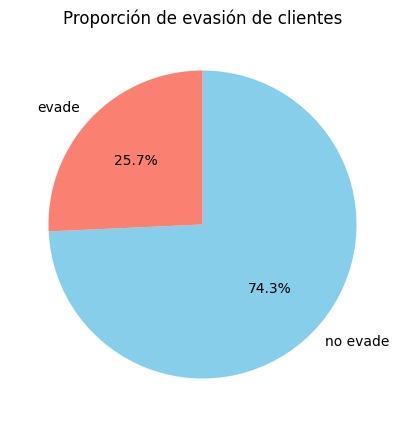

In [285]:

# Calcular proporciones de evasores y no evasores
evasion_counts = data['evasion'].value_counts().sort_index()
labels = ['no evade', 'evade']
values = [evasion_counts[0], evasion_counts[1]]
colors = ['skyblue', 'salmon']

# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(
    values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
ax.set_title('Proporción de evasión de clientes')

# Guardar como imagen
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Telecom_X/grafico_evasion_prop.png")

# Mostrar gráfico
plt.show()



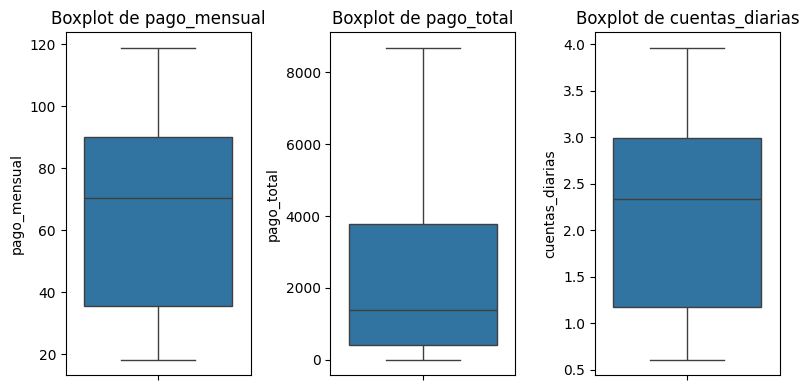

In [286]:
# Estadísticas descriptivas
desc_stats = data[['pago_mensual', 'pago_total', 'cuentas_diarias']].describe()

# Crear gráficos boxplot verticales en gráficos separados
plt.figure(figsize=(8, 4))
variables = ['pago_mensual', 'pago_total', 'cuentas_diarias']

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()

# Guardar gráfico (ruta corregida)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Telecom_X/boxplot_variables.png')

# Mostrar estadísticas y gráfico
plt.show()


In [287]:
data

,id_cliente,evasion,genero,senior,pareja,dependientes,antiguedad,s_telefono,multipleslineas,s_internet,...,proteccion_d,serv_tec,tv_str,pel_str,contrato,boleta_elec,met_pago,pago_mensual,pago_total,cuentas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,2,...,0,1,1,0,2,1,2,65.60,593.30,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,2,...,0,0,0,1,1,0,2,59.90,542.40,2.00
2,0004-TLHLJ,1,0,0,0,0,4,1,0,1,...,1,0,0,0,1,1,1,73.90,280.85,2.46
3,0011-IGKFF,1,0,1,1,0,13,1,0,1,...,1,0,1,1,1,1,1,98.00,1237.85,3.27
4,0013-EXCHZ,1,1,1,1,0,3,1,0,1,...,0,1,1,0,1,1,2,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,2,...,0,1,0,0,2,0,2,55.15,742.90,1.84
7263,9992-RRAMN,1,0,0,1,0,22,1,1,1,...,0,0,0,1,1,1,1,85.10,1873.70,2.84
7264,9992-UJOEL,0,0,0,0,0,2,1,0,2,...,0,0,0,0,1,1,2,50.30,92.75,1.68
7265,9993-LHIEB,0,0,0,1,1,67,1,0,2,...,1,1,0,1,3,0,2,67.85,4627.65,2.26


In [290]:
# Mapeo de género y evasión
data['genero_label'] = data['genero'].map({0: 'masculino', 1: 'femenino'})
data['evasion_label'] = data['evasion'].map({0: 'no evade', 1: 'evade'})

# Agrupar por género y evasión
evasion_por_genero = data.groupby(['genero_label', 'evasion_label']).size().reset_index(name='cantidad')

# Separar por género
masculino = evasion_por_genero[evasion_por_genero['genero_label'] == 'masculino']
femenino = evasion_por_genero[evasion_por_genero['genero_label'] == 'femenino']

# Crear subgráficos
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Pie masculino
fig.add_trace(go.Pie(
    labels=masculino['evasion_label'],
    values=masculino['cantidad'],
    name="masculino",
    marker_colors=['#90ee90', '#006400'],
    legendgroup='masculino',
    showlegend=True,
    textinfo='percent+label'  # ← para mostrar porcentaje y etiqueta
), 1, 1)

# Pie femenino
fig.add_trace(go.Pie(
    labels=femenino['evasion_label'],
    values=femenino['cantidad'],
    name="femenino",
    marker_colors=['#d8b5ff', '#800080'],
    legendgroup='femenino',
    showlegend=True,
    textinfo='percent+label'
), 1, 2)

# Ajustes finales
fig.update_layout(
    title_text='Proporción de evasión por género',
    width=900,
    height=500,
    annotations=[
        dict(text='Masculino', x=0.20, y=0.05, font_size=14, showarrow=False),
        dict(text='Femenino', x=0.80, y=0.05, font_size=14, showarrow=False)
    ]
)

fig.show()

# Guardar imagen (requiere kaleido)
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/grafico_evasion_genero.html")


In [293]:
# Mapear etiquetas descriptivas
data['senior_label'] = data['senior'].map({0: 'menor de 65', 1: 'mayor o igual a 65'})
data['evasion_label'] = data['evasion'].map({0: 'no evade', 1: 'evade'})
data['grupo'] = data['senior_label'] + ' - ' + data['evasion_label']

# Contar combinaciones
conteo = data['grupo'].value_counts().reset_index()
conteo.columns = ['grupo', 'cantidad']

# Mapa de colores personalizado
color_map = {
    'menor de 65 - no evade': '#add8e6',      # azul claro
    'menor de 65 - evade': '#00008b',         # azul oscuro
    'mayor o igual a 65 - no evade': '#ffd580', # naranja claro
    'mayor o igual a 65 - evade': '#ff8c00'     # naranja oscuro
}

# Crear gráfico de pastel interactivo
fig = px.pie(
    conteo,
    names='grupo',
    values='cantidad',
    title='Proporción de evasión según edad (mayor o menor de 65 años)',
    color='grupo',
    color_discrete_map=color_map
)

# Mejorar legibilidad
fig.update_traces(textinfo='percent', textposition='outside', textfont_size=14)

# Ajustar tamaño y diseño
fig.update_layout(title_font_size=20, legend_font_size=14, width=800, height=500)

# Guardar como imagen
#fig.write_image("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_edad.png")

# Mostrar el gráfico
fig.show()

# Guardar imagen (requiere kaleido)
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_edad.html")

In [295]:
# Mapear etiquetas
data['pareja_label'] = data['pareja'].map({0: 'sin pareja', 1: 'con pareja'})
data['evasion_label'] = data['evasion'].map({0: 'no evade', 1: 'evade'})
data['grupo'] = data['pareja_label'] + ' - ' + data['evasion_label']

# Calcular conteo por grupo
conteo = data['grupo'].value_counts().reset_index()
conteo.columns = ['grupo', 'cantidad']

# Colores personalizados
color_map = {
    'sin pareja - no evade': '#b0c4de',    # azul-gris claro
    'sin pareja - evade': '#4682b4',       # azul acero
    'con pareja - no evade': '#ffe4e1',    # rosado claro
    'con pareja - evade': '#ff69b4'        # rosado fuerte
}

# Crear gráfico de pastel
fig = px.pie(
    conteo,
    names='grupo',
    values='cantidad',
    title='Proporción de evasión según situación de pareja',
    color='grupo',
    color_discrete_map=color_map
)

# Mejorar legibilidad
fig.update_traces(textinfo='percent', textposition='outside', textfont_size=14)
fig.update_layout(title_font_size=20, legend_font_size=14)

# Ajustar tamaño y diseño
fig.update_layout(title_font_size=20, legend_font_size=14, width=800, height=500)

# Mostrar el gráfico
fig.show()

# Guardar como imagen
#fig.write_image("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_pareja.png")
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_pareja.html")

In [296]:
# Mapear etiquetas
data['dependientes_label'] = data['dependientes'].map({0: 'sin dependientes', 1: 'con dependientes'})
data['evasion_label'] = data['evasion'].map({0: 'no evade', 1: 'evade'})
data['grupo'] = data['dependientes_label'] + ' - ' + data['evasion_label']

# Calcular cantidad por grupo
conteo = data['grupo'].value_counts().reset_index()
conteo.columns = ['grupo', 'cantidad']

# Colores personalizados
color_map = {
    'sin dependientes - no evade': '#cce5ff',
    'sin dependientes - evade': '#3399ff',
    'con dependientes - no evade': '#ffe5b4',
    'con dependientes - evade': '#ff8c00'
}

# Crear gráfico de pastel
fig = px.pie(
    conteo,
    names='grupo',
    values='cantidad',
    title='Proporción de evasión según presencia de dependientes',
    color='grupo',
    color_discrete_map=color_map
)

# Ajustar el texto para que se muestre afuera de cada porción
fig.update_traces(textinfo='percent', textposition='outside', textfont_size=14)

# Ajustar tamaño y diseño
fig.update_layout(title_font_size=20, legend_font_size=14, width=800, height=500)

# Mostrar el gráfico
fig.show()

# Guardar como imagen
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_depend.html")


In [298]:

# Crear tramos de antigüedad
bins = range(0, data["antiguedad"].max() + 10, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
data["tramo_antiguedad"] = pd.cut(
    data["antiguedad"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Agrupar por tramo y evasión
conteo = data.groupby(["tramo_antiguedad", "evasion"], observed=True).size().reset_index(name="cantidad")

# Mapear evasión a etiquetas legibles
conteo["evasion"] = conteo["evasion"].map({0: "No evade", 1: "Evade"})

# Gráfico de barras
fig = px.bar(
    conteo,
    x="tramo_antiguedad",
    y="cantidad",
    color="evasion",
    barmode="group",
    labels={"tramo_antiguedad": "Antigüedad (meses)", "cantidad": "Cantidad de clientes"},
    title="Distribución de Clientes por Tramos de Antigüedad y Evasión",
    color_discrete_map={"No evade": "green", "Evade": "red"}
)

# Ajustar tamaño
fig.update_layout(width=600, height=500)

# Mostrar gráfico
fig.show()

# Guardar como HTML (interactivo)
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_antiguedad.html")


In [300]:
# Columnas de servicios contratados (excluyendo s_internet)
servicios = data.columns[[7,8,10,11,12,13,14,15]]

# Asegurarse de que todas sean binarias
data[servicios] = data[servicios].applymap(lambda x: 1 if x != 0 else 0)

# Separar por evasión
evaden = data[data['evasion'] == 1]
no_evaden = data[data['evasion'] == 0]

# Calcular contrataciones por servicio
evaden_sums = evaden[servicios].sum()
no_evaden_sums = no_evaden[servicios].sum()

# Crear DataFrame para stacked bar
df_stacked = pd.DataFrame({
    'Servicio': servicios,
    'Evaden': evaden_sums.values,
    'No evaden': no_evaden_sums.values
})

# Convertir a formato largo
df_stacked = df_stacked.melt(id_vars='Servicio',
                             var_name='Grupo',
                             value_name='Cantidad')

# Calcular total por servicio para porcentaje
totales_por_servicio = df_stacked.groupby('Servicio')['Cantidad'].transform('sum')
df_stacked['Porcentaje'] = (df_stacked['Cantidad'] / totales_por_servicio * 100).round(2)

# Ordenar por total
orden = (evaden_sums + no_evaden_sums).sort_values(ascending=False).index.tolist()
df_stacked['Servicio'] = pd.Categorical(df_stacked['Servicio'], categories=orden, ordered=True)
df_stacked = df_stacked.sort_values('Servicio')

# Gráfico de barras apiladas (porcentaje)
fig = px.bar(df_stacked,
             x='Servicio', y='Porcentaje', color='Grupo',
             text='Porcentaje',
             title='Distribución porcentual de servicios contratados: Evaden vs No evaden',
             color_discrete_map={'Evaden': 'orange', 'No evaden': 'lightblue'})

fig.update_traces(texttemplate='%{text}%', textposition='inside')
fig.update_layout(barmode='stack', xaxis_title='Servicio', yaxis_title='Porcentaje')

# ajustar tamaño
fig.update_layout(width=800, height=500)

fig.show()

# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_servicios.html")

<ipython-input-300-91d5978217d4>:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [301]:
# Graficar probabilidad de evasión vs cantidad de servicios contratados
# Seleccionar columnas de servicios (según las instrucciones anteriores: columnas 8 a 15)
columnas_servicios = data.columns[[7,8,10,11,12,13,14,15]]

# Crear columna con el total de servicios contratados por cliente
data['total_servicios'] = data[columnas_servicios].sum(axis=1)

# Agrupar por número de servicios y calcular la tasa de evasión
evasion_por_servicios = data.groupby('total_servicios')['evasion'].mean().reset_index()

# Graficar la relación
import plotly.express as px

fig = px.line(
    evasion_por_servicios,
    x='total_servicios',
    y='evasion',
    title='Probabilidad de evasión según número de servicios contratados',
    markers=True,
    labels={'total_servicios': 'Número de servicios contratados', 'evasion': 'Tasa de evasión'}
)
fig.update_traces(line=dict(width=3), marker=dict(size=8))
fig.update_layout(title_font_size=20, xaxis=dict(dtick=1))

# ajustar tamaño
fig.update_layout(width=800, height=500)

fig.show()

# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_servicios_num.html")

In [303]:
data['internet_tipo'] = data['s_internet'].map({
    0: 'No tiene Internet',
    1: 'Fibra óptica',
    2: 'DSL'
})

# Agrupar y calcular la tasa de evasión
evas_internet = data.groupby('internet_tipo', as_index=False)['evasion'].mean()
evas_internet['evasion'] *= 100  # a porcentaje

# Ordenar explícitamente para asegurar orden lógico
orden_tipo = ['No tiene Internet', 'DSL', 'Fibra óptica']
evas_internet['internet_tipo'] = pd.Categorical(evas_internet['internet_tipo'], categories=orden_tipo, ordered=True)
evas_internet = evas_internet.sort_values('internet_tipo')

# Graficar
fig = px.bar(
    evas_internet,
    x='internet_tipo',
    y='evasion',
    title='Tasa de evasión según tipo de servicio de Internet',
    labels={'internet_tipo': 'Tipo de Internet', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='internet_tipo',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=600, height=500, yaxis_range=[0, evas_internet['evasion'].max() + 5])

fig.show()
# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_internet.html")

In [304]:
# Mapear valores para legibilidad
map_contrato = {1: 'Mensual', 2: 'Anual', 3: 'Bianual'}
map_evasion = {0: 'No evade', 1: 'Evade'}

data['contrato_nombre'] = data['contrato'].map(map_contrato)
data['evasion_nombre'] = data['evasion'].map(map_evasion)

# Agrupar y calcular proporciones por tipo de contrato
conteo = data.groupby(['contrato_nombre', 'evasion_nombre']).size().reset_index(name='cuenta')

# Total por tipo de contrato para porcentaje
total_por_contrato = conteo.groupby('contrato_nombre')['cuenta'].transform('sum')
conteo['porcentaje'] = (conteo['cuenta'] / total_por_contrato * 100).round(1)

# Crear gráfico
fig = px.bar(
    conteo,
    x='contrato_nombre',
    y='porcentaje',
    color='evasion_nombre',
    barmode='stack',
    text=conteo['porcentaje'].astype(str) + '%',
    color_discrete_map={'Evade': 'orange', 'No evade': 'lightblue'}
)

fig.update_layout(
    title='Porcentaje de evasión según tipo de contrato',
    xaxis_title='Tipo de contrato',
    yaxis_title='Porcentaje',
    legend_title='Evasión')

fig.update_traces(textposition='outside')
fig.update_layout(width=600, height=500)
fig.show()

# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_contrato.html")

In [305]:
# Mapear tipo de boleta
data['tipo_boleta'] = data['boleta_elec'].map({
    0: 'Boleta en papel',
    1: 'Boleta electrónica'
})

# Calcular tasa de evasión por tipo de boleta
evas_boleta = data.groupby('tipo_boleta')['evasion'].mean().reset_index()
evas_boleta['evasion'] = evas_boleta['evasion'] * 100  # en porcentaje

# Graficar
fig = px.bar(
    evas_boleta,
    x='tipo_boleta',
    y='evasion',
    title='Tasa de evasión según tipo de boleta',
    labels={'tipo_boleta': 'Tipo de boleta', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='tipo_boleta',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, evas_boleta['evasion'].max() + 5])
# ajustar tamaño
fig.update_layout(width=600, height=500)

fig.show()
#guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_boleta.html")

In [307]:
# Crear rangos de pago mensual
bins = [0, 30, 60, 90, 120, 150]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150']
data['rango_pago'] = pd.cut(
    data['pago_mensual'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calcular tasa de evasión promedio por rango de pago
evas_pago = data.groupby('rango_pago', observed=True)['evasion'].mean().reset_index()
evas_pago['evasion'] *= 100  # Convertir a porcentaje

# Graficar
fig = px.bar(
    evas_pago,
    x='rango_pago',
    y='evasion',
    title='Tasa de evasión según pago mensual',
    labels={'rango_pago': 'Rango de pago mensual', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='rango_pago',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Mejorar visualización
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_range=[0, evas_pago['evasion'].max() + 5],
    width=600,
    height=500,
    showlegend=False
)

# Mostrar gráfico
fig.show()

# Guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_pago.html")

In [308]:
# Mapear métodos de pago
data['met_pago_label'] = data['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Calcular tasa de evasión por método de pago
evas_pago = data.groupby('met_pago_label')['evasion'].mean().reset_index()
evas_pago['evasion'] *= 100  # Convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    evas_pago,
    x='met_pago_label',
    y='evasion',
    title='Tasa de evasión según método de pago',
    labels={'met_pago_label': 'Método de pago', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='met_pago_label',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, evas_pago['evasion'].max() + 5])
fig.update_layout(width=600, height=500)

fig.show()

# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_met_pago.html")

In [309]:
# Mapear métodos de pago
data['met_pago_label'] = data['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Mapear tipo de contrato
data['contrato_label'] = data['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Agrupar y calcular tasa de evasión
grupo = data.groupby(['met_pago_label', 'contrato_label'])['evasion'].mean().reset_index()
grupo['evasion'] *= 100  # porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo,
    x='met_pago_label',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según método de pago y tipo de contrato',
    labels={'met_pago_label': 'Método de pago', 'evasion': 'Tasa de evasión (%)', 'contrato_label': 'Tipo de contrato'},
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, grupo['evasion'].max() + 5])

fig.show()
# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_met_pago_contrato.html")

In [311]:
# Mapear tipo de contrato
data['contrato_label'] = data['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Crear rangos de antigüedad (en meses)
bins_ant = [0, 12, 24, 48, 72, 100]
labels_ant = ['0-12', '13-24', '25-48', '49-72', '73-100']
data['rango_antiguedad'] = pd.cut(data['antiguedad'], bins=bins_ant, labels=labels_ant, include_lowest=True)

# Agrupar y calcular tasa de evasión (con observed=True para evitar el warning)
grupo_ant = data.groupby(['rango_antiguedad', 'contrato_label'], observed=True)['evasion'].mean().reset_index()
grupo_ant['evasion'] *= 100  # Convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_ant,
    x='rango_antiguedad',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según antigüedad y tipo de contrato',
    labels={
        'rango_antiguedad': 'Antigüedad (meses)',
        'evasion': 'Tasa de evasión (%)',
        'contrato_label': 'Tipo de contrato'
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Mejoras de visualización
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_range=[0, grupo_ant['evasion'].max() + 5],
    width=700,
    height=500
)

fig.show()

# Guardar como archivo HTML
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/antiguedad_contrato.html")



In [315]:
# Crear rangos para cuentas_diarias
bins_cd = [0, 1.5, 2.0, 2.5, 3.0, 4.0]
labels_cd = ['≤1.5', '1.51–2.0', '2.01–2.5', '2.51–3.0', '>3.0']
data['rango_diario'] = pd.cut(data['cuentas_diarias'], bins=bins_cd, labels=labels_cd, include_lowest=True)

# Calcular tasa de evasión por rango (con observed=True para evitar warning)
evas_diarias = data.groupby('rango_diario', observed=True)['evasion'].mean().reset_index()
evas_diarias['evasion'] *= 100  # Convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    evas_diarias,
    x='rango_diario',
    y='evasion',
    title='Tasa de evasión según costo diario',
    labels={'rango_diario': 'Rango de costo diario', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='rango_diario',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Mejorar estética
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_range=[0, evas_diarias['evasion'].max() + 5],
    width=600,
    height=500,
    showlegend=False
)

fig.show()

# Guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_cuentas_diarias.html")


In [319]:
# Mapear tipo de contrato
data['contrato_label'] = data['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Crear rangos para cuentas_diarias
bins_cd = [0, 1.5, 2.0, 2.5, 3.0, 4.0]
labels_cd = ['≤1.5', '1.51–2.0', '2.01–2.5', '2.51–3.0', '>3.0']
data['rango_diario'] = pd.cut(data['cuentas_diarias'], bins=bins_cd, labels=labels_cd, include_lowest=True)

# Agrupar y calcular tasa de evasión con observed=True
grupo_cd = data.groupby(['rango_diario', 'contrato_label'], observed=True)['evasion'].mean().reset_index()
grupo_cd['evasion'] *= 100  # convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_cd,
    x='rango_diario',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según costo diario y tipo de contrato',
    labels={
        'rango_diario': 'Rango de costo diario',
        'evasion': 'Tasa de evasión (%)',
        'contrato_label': 'Tipo de contrato'
    },
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_range=[0, grupo_cd['evasion'].max() + 5],
    width=700,
    height=500
)

fig.show()

# Guarda
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/cuentas_diarias_contrato.html")

In [323]:
# Mapear método de pago
data['met_pago_label'] = data['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Crear rangos para cuentas_diarias
bins_cd = [0, 1.5, 2.0, 2.5, 3.0, 4.0]
labels_cd = ['≤1.5', '1.51–2.0', '2.01–2.5', '2.51–3.0', '>3.0']
data['rango_diario'] = pd.cut(data['cuentas_diarias'], bins=bins_cd, labels=labels_cd, include_lowest=True)

# Agrupar y calcular tasa de evasión
grupo_cd_pago = data.groupby(['rango_diario', 'met_pago_label'], observed=True)['evasion'].mean().reset_index()
grupo_cd_pago['evasion'] *= 100  # a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_cd_pago,
    x='rango_diario',
    y='evasion',
    color='met_pago_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según costo diario y método de pago',
    labels={'rango_diario': 'Rango de costo diario', 'evasion': 'Tasa de evasión (%)', 'met_pago_label': 'Método de pago'},
    color_discrete_sequence=px.colors.qualitative.Prism
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, grupo_cd_pago['evasion'].max() + 5])

fig.show()
# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/cuentas_diarias_met_pago.html")

In [325]:
# Seleccionar columnas de servicios (s_telefono a pel_str → columnas 7 a 15)
columnas_servicios = [
    's_telefono', 'multipleslineas', 's_internet', 'seguridad_ol', 'respaldo_ol',
    'proteccion_d', 'serv_tec', 'tv_str', 'pel_str'
]

# Crear variable booleana: 1 si tiene contratado, 0 si no (i.e., != 0)
data['total_servicios_binarios'] = data[columnas_servicios].apply(lambda row: (row != 0).sum(), axis=1)

# Filtrar para evitar división por cero
df_validos = data[data['total_servicios_binarios'] > 0].copy()

# Calcular precio promedio por servicio
df_validos['precio_prom_binario'] = df_validos['pago_mensual'] / df_validos['total_servicios_binarios']

# Crear rangos de antigüedad
bins_ant = [0, 12, 24, 48, 72, 100]
labels_ant = ['0-12', '13-24', '25-48', '49-72', '73-100']
df_validos['rango_antiguedad'] = pd.cut(df_validos['antiguedad'], bins=bins_ant, labels=labels_ant, include_lowest=True)

# Agrupar y calcular promedio del precio
precio_rango = df_validos.groupby('rango_antiguedad', observed=True)['precio_prom_binario'].mean().reset_index()


# Graficar
fig = px.bar(
    precio_rango,
    x='rango_antiguedad',
    y='precio_prom_binario',
    title='Precio promedio por servicio contratado según antigüedad',
    labels={'rango_antiguedad': 'Antigüedad (meses)', 'precio_prom_binario': 'Precio promedio por servicio'},
    text='precio_prom_binario',
    color='rango_antiguedad',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_title='$ por servicio')
fig.update_layout(width=600, height=500)

fig.show()
# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/precio_prom_binario_antiguedad.html")

In [327]:
# Asegurar etiquetas de contrato
df_validos['contrato_label'] = df_validos['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Crear rangos de precio por servicio
bins_precio = [0, 10, 20, 30, 40, 60, 100]
labels_precio = ['≤10', '11–20', '21–30', '31–40', '41–60', '>60']
df_validos['rango_precio'] = pd.cut(df_validos['precio_prom_binario'], bins=bins_precio, labels=labels_precio, include_lowest=True)

# Calcular tasa de evasión por rango de precio y tipo de contrato
grupo_precio_contrato = df_validos.groupby(['rango_precio', 'contrato_label'], observed=True)['evasion'].mean().reset_index()
grupo_precio_contrato['evasion'] *= 100  # a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_precio_contrato,
    x='rango_precio',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según precio por servicio y tipo de contrato',
    labels={'rango_precio': 'Precio promedio por servicio', 'evasion': 'Tasa de evasión (%)', 'contrato_label': 'Tipo de contrato'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_precio_contrato.html")

In [328]:
# Mapear método de pago
df_validos['met_pago_label'] = df_validos['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Asegurar que el rango de precio por servicio ya existe
bins_precio = [0, 10, 20, 30, 40, 60, 100]
labels_precio = ['≤10', '11–20', '21–30', '31–40', '41–60', '>60']
df_validos['rango_precio'] = pd.cut(df_validos['precio_prom_binario'], bins=bins_precio, labels=labels_precio, include_lowest=True)

# Agrupar y calcular tasa de evasión
grupo_precio_pago = df_validos.groupby(['rango_precio', 'met_pago_label'], observed=True)['evasion'].mean().reset_index()
grupo_precio_pago['evasion'] *= 100  # convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_precio_pago,
    x='rango_precio',
    y='evasion',
    color='met_pago_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según precio por servicio y método de pago',
    labels={'rango_precio': 'Precio promedio por servicio', 'evasion': 'Tasa de evasión (%)', 'met_pago_label': 'Método de pago'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

# guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/evasion_precio_met_pago.html")

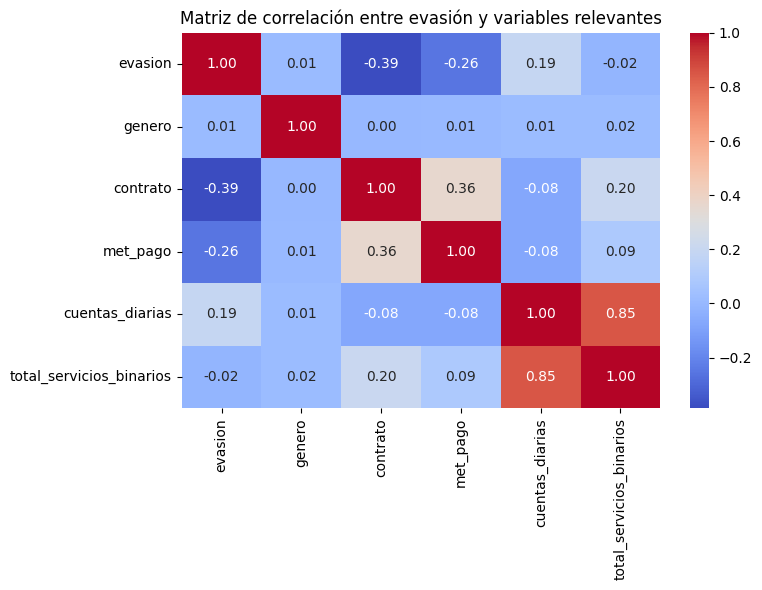

In [329]:
# Matriz correlación
# Crear columnas necesarias
columnas_servicios = [
    's_telefono', 'multipleslineas', 's_internet', 'seguridad_ol', 'respaldo_ol',
    'proteccion_d', 'serv_tec', 'tv_str', 'pel_str'
]

data['total_servicios_binarios'] = data[columnas_servicios].apply(lambda row: (row != 0).sum(), axis=1)

# Seleccionar variables relevantes
vars_corr = ['evasion', 'genero', 'contrato', 'met_pago', 'cuentas_diarias', 'total_servicios_binarios']
cor_matrix = data[vars_corr].corr()

# Visualizar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre evasión y variables relevantes")
plt.tight_layout()

# Mostrar correlación ordenada con evasión
cor_matrix['evasion'].sort_values(ascending=False)

plt.show()


#guardar
fig.write_html("/content/drive/MyDrive/Colab Notebooks/Telecom_X/matriz_correlacion.html")


#📄Informe final

# 📄 Análisis de Evasión de Clientes (Churn) - TelecomX LATAM

## 🔹 Introducción

El presente análisis tiene como objetivo principal estudiar el fenómeno de evasión de clientes (Churn) en TelecomX LATAM. La retención de clientes es crítica en el sector de telecomunicaciones, donde los costos de adquisición son elevados y la competencia es fuerte. A través de este proyecto, se buscó identificar patrones de comportamiento que predicen la cancelación de servicios, con el fin de proponer estrategias de retención más efectivas.

## 🔹 Limpieza y Tratamiento de Datos

Durante la fase de preparación de datos, se aplicaron los siguientes pasos:

- Importación de los datos utilizando `pandas`.
- Eliminación de duplicados y filas con datos incompletos.
- Estandarización de nombres de columnas y etiquetas categóricas.
- Conversión de columnas de fechas al formato `datetime`.
- Imputación de valores nulos con la media o la moda, según corresponda.
- Recategorización de variables como tipo de contrato, método de pago y servicios activos para una mejor interpretación.

Estas transformaciones permitieron obtener un conjunto de datos limpio, coherente y listo para el análisis.

## 🔹 Análisis Exploratorio de Datos

El análisis exploratorio reveló hallazgos clave:

- Clientes con **servicios técnicos deficientes** (más fallas, más quejas) tienen una mayor tasa de cancelación.
- Usuarios con **contratos mensuales** presentan una propensión significativamente mayor al churn que aquellos con contratos anuales o de largo plazo.
- La **ausencia de servicios adicionales** (como internet o televisión por cable) se asocia a una mayor evasión.
- Se observaron **patrones por grupo etario** y nivel de ingresos: ciertos segmentos cancelan más frecuentemente.

Se utilizaron visualizaciones como histogramas, gráficos de barras y mapas de calor de correlación para respaldar estos hallazgos.

## 🔹 Conclusiones e Insights

- Existen **factores técnicos y contractuales fuertemente ligados a la evasión** de clientes.
- La **multicontratación de servicios** se presenta como una posible estrategia de retención.
- La **calidad percibida del servicio** impacta directamente en la fidelidad del cliente.
- Clientes más antiguos y con historial de múltiples servicios muestran **mayor lealtad**.

## 🔹 Recomendaciones

- **Mejorar la calidad del servicio técnico** en zonas con más reportes negativos.
- **Fomentar planes de fidelización** para quienes tienen múltiples servicios contratados.
- Implementar **campañas proactivas** de retención para clientes con contrato mensual.
- Utilizar modelos predictivos para crear un **sistema de alerta temprana** de cancelaciones.

---

Este informe resume el trabajo realizado y presenta una base sólida para futuras acciones estratégicas de TelecomX LATAM.
